In [2]:
import pandas as pd

# Load the HR dataset
file_path = "C:\\Users\\MM\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None,
    Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    ...  RelationshipSatisfaction StandardHours  Stoc

C:\Users\MM\AppData\Local\Temp\ipykernel_6812\3169621596.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_dept.values, y=attrition_by_dept.index, ax=axs[0, 0], palette="Blues_d")
C:\Users\MM\AppData\Local\Temp\ipykernel_6812\3169621596.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_overtime.values, y=attrition_by_overtime.index, ax=axs[0, 1], palette="Oranges_d")
C:\Users\MM\AppData\Local\Temp\ipykernel_6812\3169621596.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_jobrole.values, 

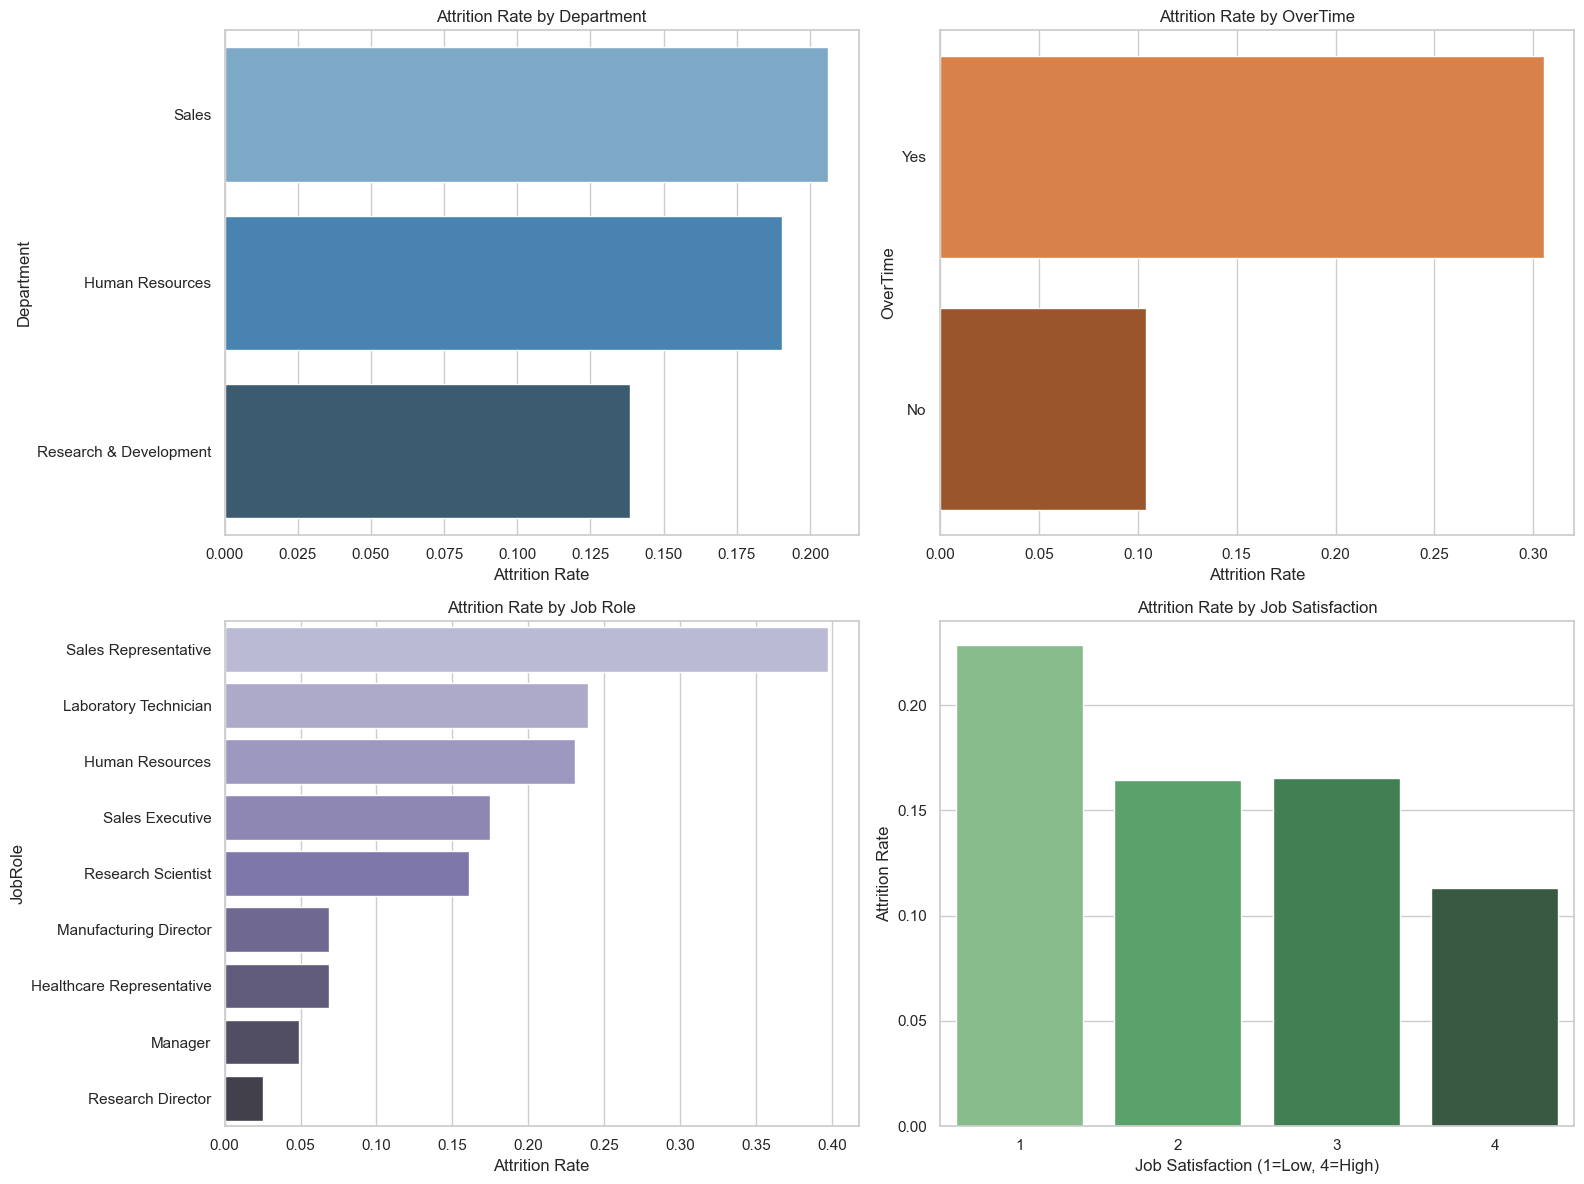

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Convert Attrition to binary for easier analysis
df['Attrition_Binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Grouped analysis for key EDA insights
attrition_by_dept = df.groupby('Department')['Attrition_Binary'].mean().sort_values(ascending=False)
attrition_by_overtime = df.groupby('OverTime')['Attrition_Binary'].mean().sort_values(ascending=False)
attrition_by_jobrole = df.groupby('JobRole')['Attrition_Binary'].mean().sort_values(ascending=False)
attrition_by_satisfaction = df.groupby('JobSatisfaction')['Attrition_Binary'].mean().sort_values(ascending=False)

# Create subplots for 4 key visualizations
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Attrition by Department
sns.barplot(x=attrition_by_dept.values, y=attrition_by_dept.index, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title("Attrition Rate by Department")
axs[0, 0].set_xlabel("Attrition Rate")

# Attrition by OverTime
sns.barplot(x=attrition_by_overtime.values, y=attrition_by_overtime.index, ax=axs[0, 1], palette="Oranges_d")
axs[0, 1].set_title("Attrition Rate by OverTime")
axs[0, 1].set_xlabel("Attrition Rate")

# Attrition by Job Role
sns.barplot(x=attrition_by_jobrole.values, y=attrition_by_jobrole.index, ax=axs[1, 0], palette="Purples_d")
axs[1, 0].set_title("Attrition Rate by Job Role")
axs[1, 0].set_xlabel("Attrition Rate")

# Attrition by Job Satisfaction
sns.barplot(x=attrition_by_satisfaction.index, y=attrition_by_satisfaction.values, ax=axs[1, 1], palette="Greens_d")
axs[1, 1].set_title("Attrition Rate by Job Satisfaction")
axs[1, 1].set_ylabel("Attrition Rate")
axs[1, 1].set_xlabel("Job Satisfaction (1=Low, 4=High)")

plt.tight_layout()
plt.show()

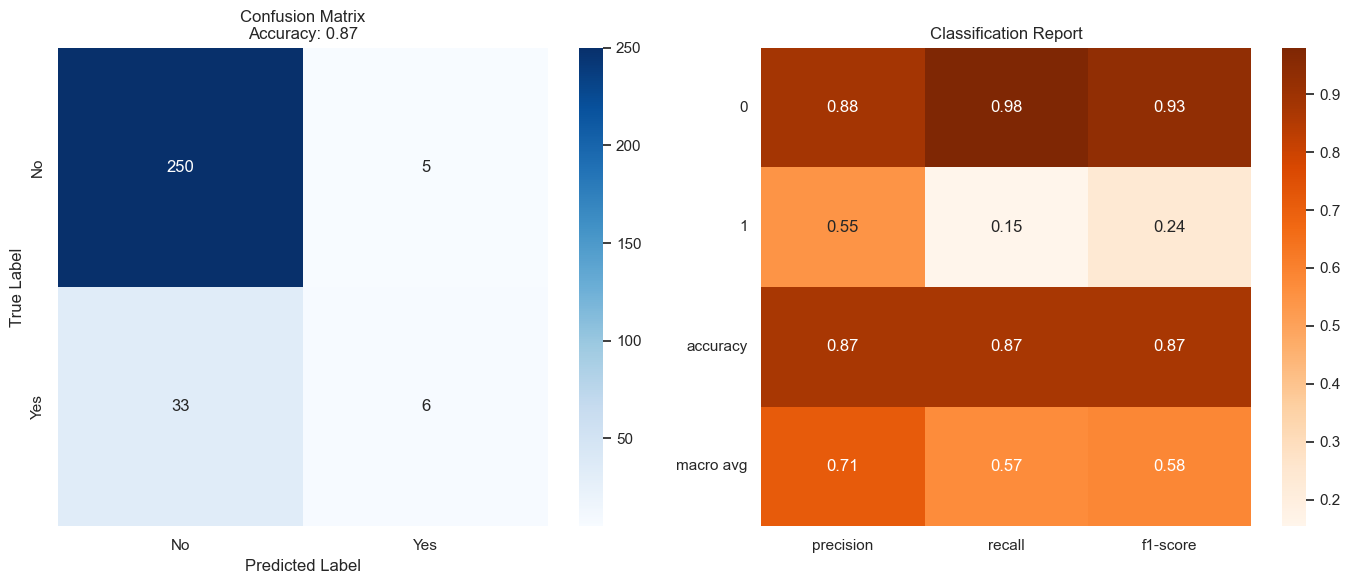

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(14, 6))

# 1. Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 2. Classification Report
plt.subplot(1, 2, 2)
report_df = pd.DataFrame(class_report).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Oranges', fmt=".2f")
plt.title('Classification Report')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


In [10]:
!pip install shap


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 3.0 MB/s eta 0:00:00


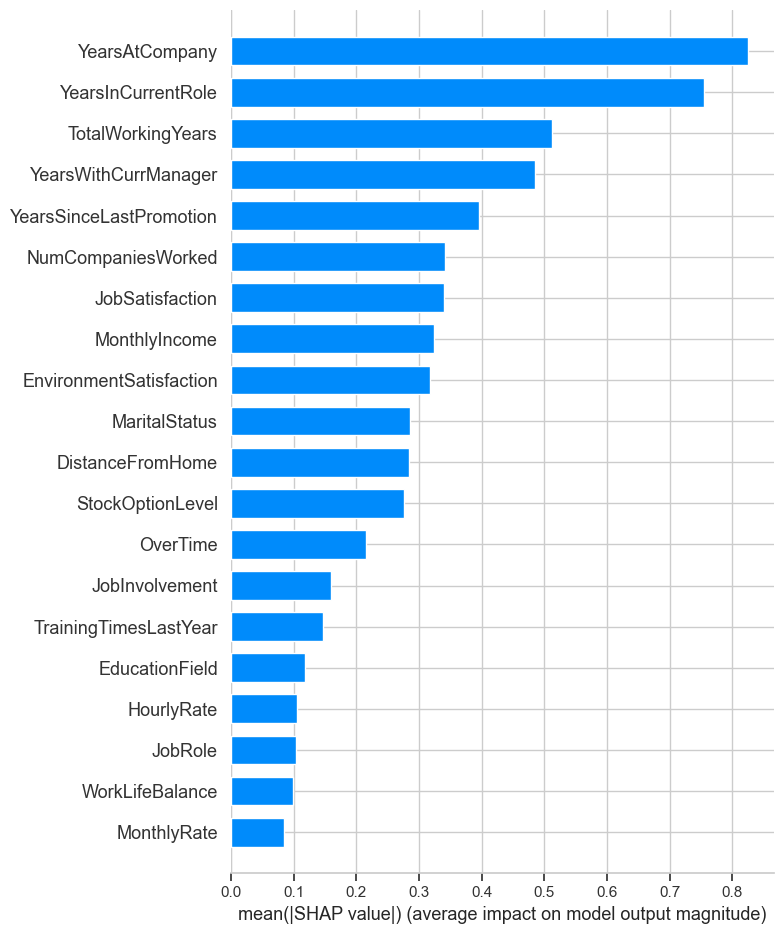

In [11]:
import shap

explainer = shap.Explainer(lr_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


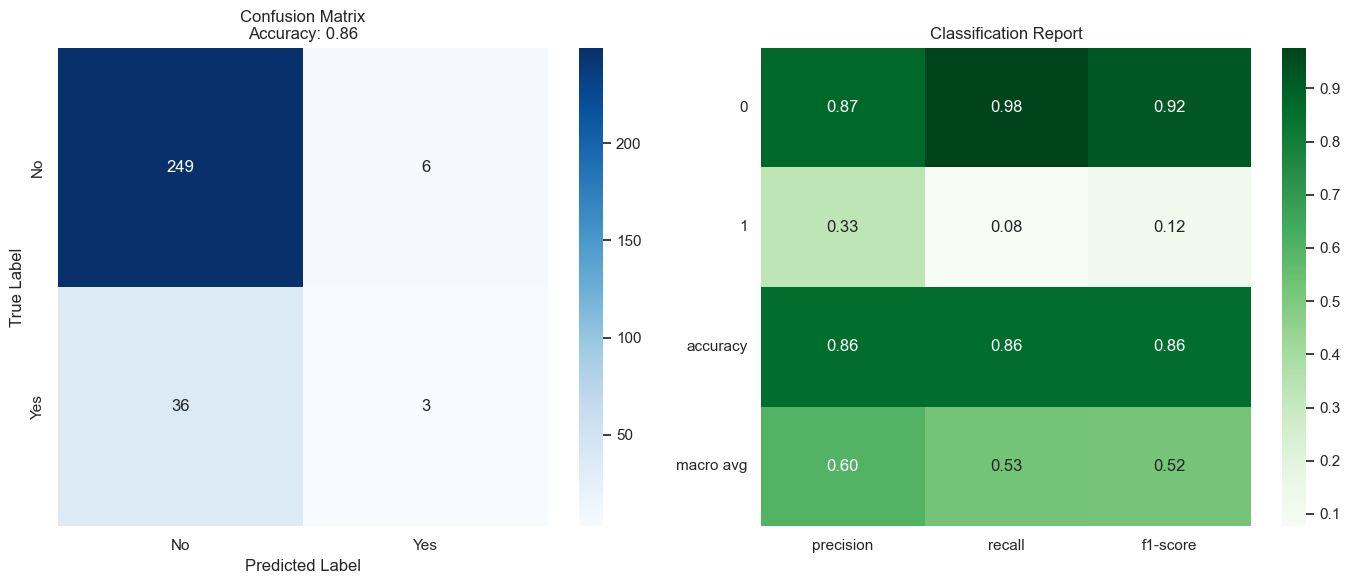

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

# 1. Train the model (as you already have)
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 2. Metrics
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# 3. Plotting
plt.figure(figsize=(14, 6))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_dt:.2f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Classification Report
plt.subplot(1, 2, 2)
report_df = pd.DataFrame(report_dt).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Greens', fmt=".2f")  # exclude accuracy row
plt.title('Classification Report')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


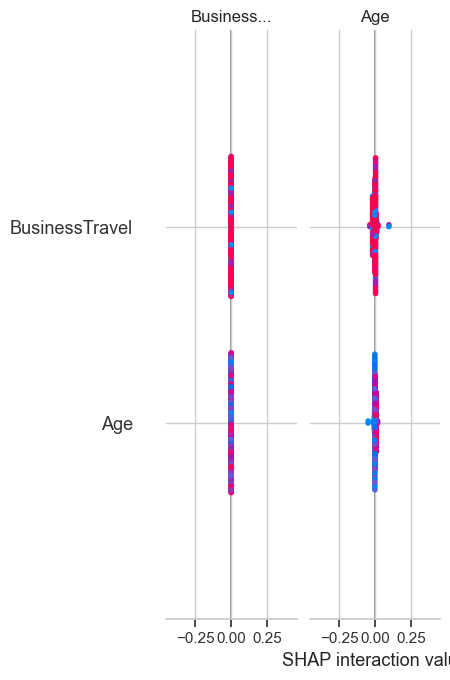

In [21]:
import shap

# Create SHAP explainer for decision tree
explainer = shap.Explainer(dt_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot: shows top features contributing to attrition
shap.summary_plot(shap_values, X_test)

In [14]:
# Save processed data
df_encoded.to_csv("C:\\Users\\MM\\Downloads\\HR_Processed_For_PowerBI.csv", index=False)
